General Embeddings

## Data Loading

We'll use the 20 newsgroups dataset from sklearn, which contains text documents from 20 different newsgroup categories. This is a popular dataset for text classification and NLP tasks.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

In [2]:
# Load the 20 newsgroups dataset
print("Loading 20 newsgroups dataset...")

# Load training data
train_data = fetch_20newsgroups(subset='train', 
                               shuffle=True, 
                               random_state=42,
                               remove=('headers', 'footers', 'quotes'))

# Load test data
test_data = fetch_20newsgroups(subset='test', 
                              shuffle=True, 
                              random_state=42,
                              remove=('headers', 'footers', 'quotes'))

print(f"Training set size: {len(train_data.data)}")
print(f"Test set size: {len(test_data.data)}")
print(f"Number of categories: {len(train_data.target_names)}")
print(f"Categories: {train_data.target_names}")

Loading 20 newsgroups dataset...
Training set size: 11314
Test set size: 7532
Number of categories: 20
Categories: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
Training set size: 11314
Test set size: 7532
Number of categories: 20
Categories: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [3]:
# Convert to pandas DataFrames
def create_dataframe(data_subset, subset_name):
    """Convert sklearn newsgroups data to pandas DataFrame"""
    df = pd.DataFrame({
        'text': data_subset.data,
        'target': data_subset.target,
        'category': [data_subset.target_names[target] for target in data_subset.target]
    })
    
    # Add text length and word count features
    df['text_length'] = df['text'].str.len()
    df['word_count'] = df['text'].str.split().str.len()
    
    # Add subset identifier
    df['subset'] = subset_name
    
    return df

# Create DataFrames
train_df = create_dataframe(train_data, 'train')
test_df = create_dataframe(test_data, 'test')

# Combine both datasets
full_df = pd.concat([train_df, test_df], ignore_index=True)

print("DataFrames created successfully!")
print(f"Training DataFrame shape: {train_df.shape}")
print(f"Test DataFrame shape: {test_df.shape}")
print(f"Combined DataFrame shape: {full_df.shape}")
print(f"\nDataFrame columns: {list(full_df.columns)}")

DataFrames created successfully!
Training DataFrame shape: (11314, 6)
Test DataFrame shape: (7532, 6)
Combined DataFrame shape: (18846, 6)

DataFrame columns: ['text', 'target', 'category', 'text_length', 'word_count', 'subset']


In [4]:
# Display basic information about the dataset
print("=== Dataset Overview ===")
print(train_df.head())
print("\n=== Data Types ===")
print(train_df.dtypes)
print("\n=== Basic Statistics ===")
print(train_df.describe())
print("\n=== Category Distribution in Training Set ===")
print(train_df['category'].value_counts())

=== Dataset Overview ===
                                                text  target  \
0  I was wondering if anyone out there could enli...       7   
1  A fair number of brave souls who upgraded thei...       4   
2  well folks, my mac plus finally gave up the gh...       4   
3  \nDo you have Weitek's address/phone number?  ...       1   
4  From article <C5owCB.n3p@world.std.com>, by to...      14   

                category  text_length  word_count subset  
0              rec.autos          475          91  train  
1  comp.sys.mac.hardware          530          90  train  
2  comp.sys.mac.hardware         1659         307  train  
3          comp.graphics           95          15  train  
4              sci.space          448          72  train  

=== Data Types ===
text           object
target          int64
category       object
text_length     int64
word_count      int64
subset         object
dtype: object

=== Basic Statistics ===
             target   text_length    word_co

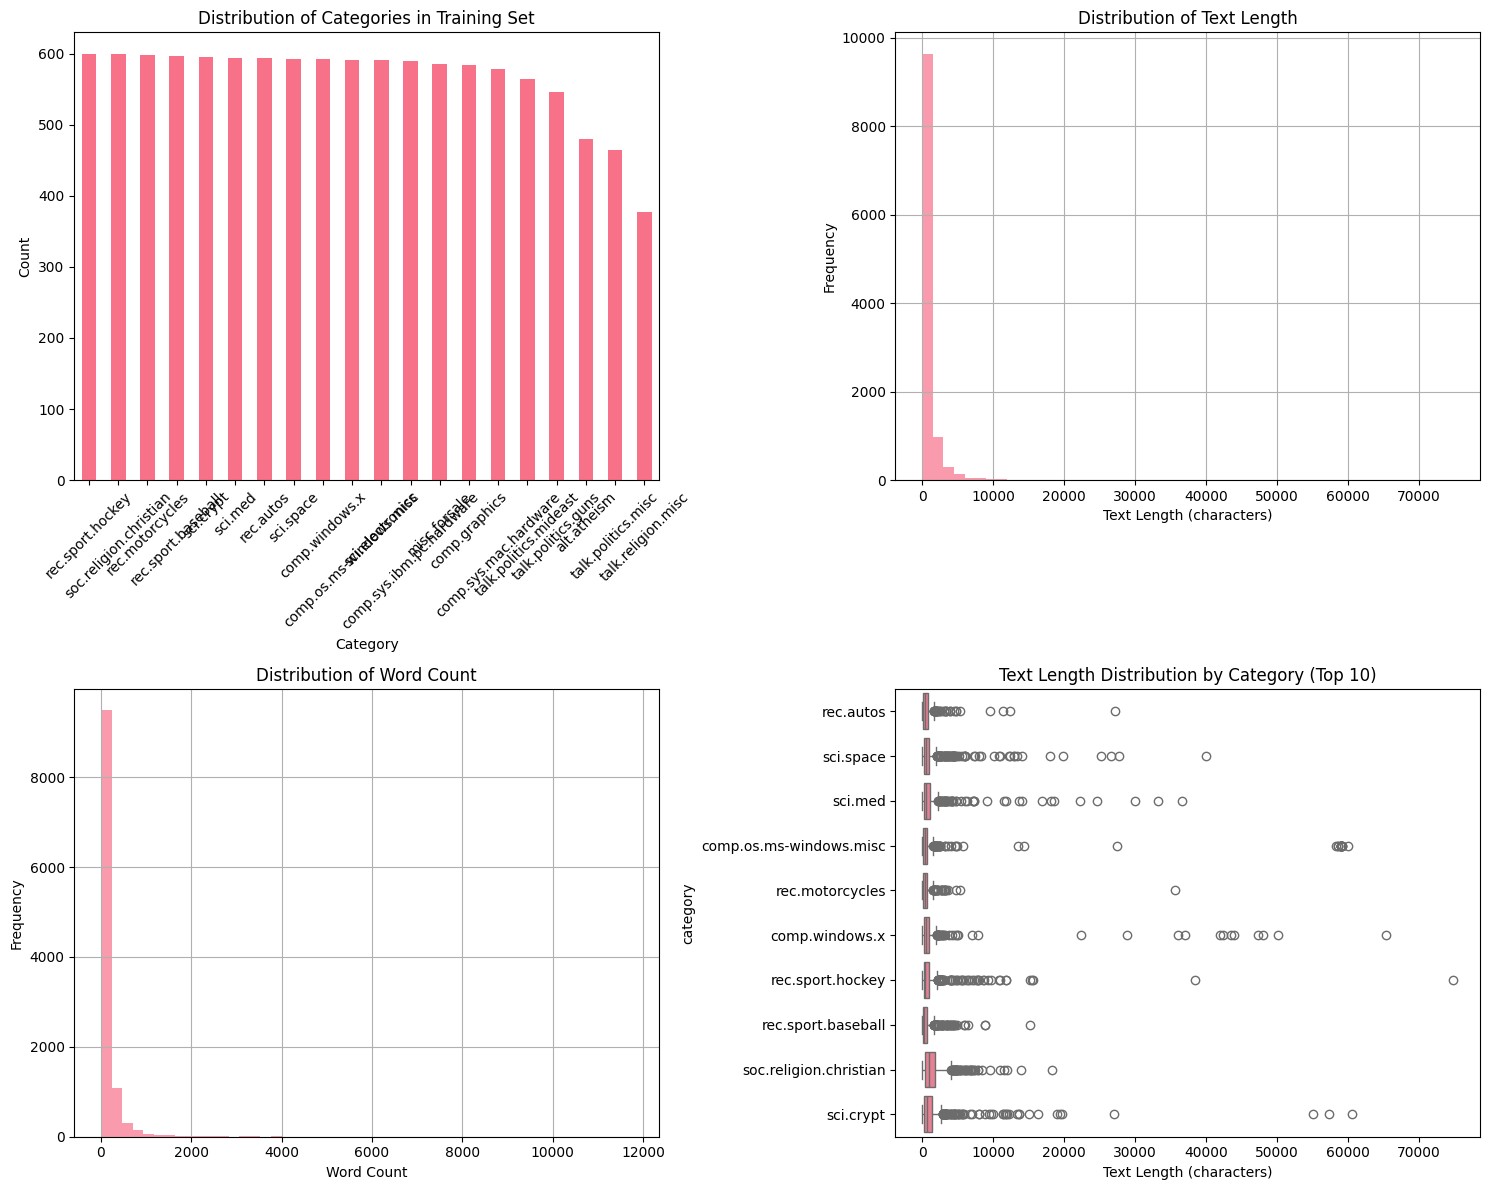

Average text length: 1218 characters
Average word count: 186 words


In [5]:
# Visualize the data distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Category distribution
train_df['category'].value_counts().plot(kind='bar', ax=axes[0,0], rot=45)
axes[0,0].set_title('Distribution of Categories in Training Set')
axes[0,0].set_xlabel('Category')
axes[0,0].set_ylabel('Count')

# 2. Text length distribution
train_df['text_length'].hist(bins=50, ax=axes[0,1], alpha=0.7)
axes[0,1].set_title('Distribution of Text Length')
axes[0,1].set_xlabel('Text Length (characters)')
axes[0,1].set_ylabel('Frequency')

# 3. Word count distribution
train_df['word_count'].hist(bins=50, ax=axes[1,0], alpha=0.7)
axes[1,0].set_title('Distribution of Word Count')
axes[1,0].set_xlabel('Word Count')
axes[1,0].set_ylabel('Frequency')

# 4. Box plot of text length by category (top 10 categories)
top_categories = train_df['category'].value_counts().head(10).index
train_subset = train_df[train_df['category'].isin(top_categories)]
sns.boxplot(data=train_subset, y='category', x='text_length', ax=axes[1,1])
axes[1,1].set_title('Text Length Distribution by Category (Top 10)')
axes[1,1].set_xlabel('Text Length (characters)')

plt.tight_layout()
plt.show()

print(f"Average text length: {train_df['text_length'].mean():.0f} characters")
print(f"Average word count: {train_df['word_count'].mean():.0f} words")

In [6]:
# Sample some text examples from different categories
print("=== Sample Text Examples ===")
sample_categories = ['sci.space', 'talk.politics.misc', 'rec.sport.baseball', 'comp.graphics', 'soc.religion.christian']

for category in sample_categories:
    if category in train_df['category'].values:
        sample_text = train_df[train_df['category'] == category]['text'].iloc[0]
        print(f"\n--- Category: {category} ---")
        print(f"Text preview (first 300 chars): {sample_text[:300]}...")
        print(f"Full text length: {len(sample_text)} characters")
        print("-" * 80)

=== Sample Text Examples ===

--- Category: sci.space ---
Text preview (first 300 chars): From article <C5owCB.n3p@world.std.com>, by tombaker@world.std.com (Tom A Baker):


My understanding is that the 'expected errors' are basically
known bugs in the warning system software - things are checked
that don't have the right values in yet because they aren't
set till after launch, and suchl...
Full text length: 448 characters
--------------------------------------------------------------------------------

--- Category: talk.politics.misc ---
Text preview (first 300 chars): 
Once again, it appears that the one-eyed man has appeared in the land of the sighted
and for some strange resaon has appointed himself the ruler and supreme power....
Full text length: 164 characters
--------------------------------------------------------------------------------

--- Category: rec.sport.baseball ---
Text preview (first 300 chars): Doug Roberts - Ken Hill for NL MVP!!
	       Let's go 'Spos
...
Full t

In [ ]:
# Import sentence transformers for generating embeddings
from sentence_transformers import SentenceTransformer
import os
import pickle
from tqdm import tqdm

# Create output directory structure
embeddings_dir = "../../embeddings_output/pretrained_embeddings"
os.makedirs(embeddings_dir, exist_ok=True)

print(f"Created directory: {embeddings_dir}")

In [ ]:
# Load the pre-trained sentence transformer model
print("Loading all-MiniLM-L6-v2 model...")
model = SentenceTransformer('all-MiniLM-L6-v2')

print(f"Model loaded successfully!")
print(f"Model max sequence length: {model.max_seq_length}")
print(f"Embedding dimension: {model.get_sentence_embedding_dimension()}")

In [ ]:
# Generate embeddings for training data
print("Generating embeddings for training data...")
print(f"Processing {len(train_df)} documents...")

# Extract texts and labels
train_texts = train_df['text'].tolist()
train_labels = train_df['target'].tolist()
train_categories = train_df['category'].tolist()

# Generate embeddings with progress bar
train_embeddings = model.encode(
    train_texts, 
    show_progress_bar=True,
    batch_size=32,  # Adjust based on your GPU memory
    convert_to_numpy=True
)

print(f"Training embeddings shape: {train_embeddings.shape}")
print(f"Embedding dimension: {train_embeddings.shape[1]}")

In [ ]:
# Prepare data structure for saving
embedding_data = {
    'embeddings': train_embeddings,
    'labels': train_labels,
    'categories': train_categories,
    'target_names': train_data.target_names,
    'model_name': 'all-MiniLM-L6-v2',
    'embedding_dim': train_embeddings.shape[1],
    'num_samples': len(train_embeddings),
    'metadata': {
        'dataset': '20newsgroups',
        'subset': 'train',
        'preprocessing': 'headers_footers_quotes_removed',
        'model_max_seq_length': model.max_seq_length
    }
}

print("Data structure prepared for saving:")
print(f"- Embeddings: {embedding_data['embeddings'].shape}")
print(f"- Labels: {len(embedding_data['labels'])}")
print(f"- Categories: {len(embedding_data['categories'])}")
print(f"- Target names: {len(embedding_data['target_names'])}")
print(f"- Model: {embedding_data['model_name']}")
print(f"- Embedding dimension: {embedding_data['embedding_dim']}")

In [ ]:
# Save embeddings and labels to pickle file
pickle_file = os.path.join(embeddings_dir, 'train_embeddings_all-MiniLM-L6-v2.pkl')

print(f"Saving embeddings to: {pickle_file}")
with open(pickle_file, 'wb') as f:
    pickle.dump(embedding_data, f)

# Also save as numpy arrays for alternative loading
np_file = os.path.join(embeddings_dir, 'train_embeddings_all-MiniLM-L6-v2.npz')
print(f"Saving as numpy arrays to: {np_file}")

np.savez_compressed(
    np_file,
    embeddings=train_embeddings,
    labels=np.array(train_labels),
    categories=np.array(train_categories),
    target_names=np.array(train_data.target_names)
)

In [ ]:
# Verify the saved files and show loading example
print("=== Verification ===")
print(f"Files created in {embeddings_dir}:")
for file in os.listdir(embeddings_dir):
    file_path = os.path.join(embeddings_dir, file)
    file_size = os.path.getsize(file_path) / (1024*1024)  # Size in MB
    print(f"  - {file} ({file_size:.2f} MB)")

print("\n=== Loading Example for Future Use ===")
print("To load the embeddings later, use:")
print(f"""
# Method 1: Load pickle file (recommended - includes all metadata)
import pickle
with open('{pickle_file}', 'rb') as f:
    data = pickle.load(f)
    embeddings = data['embeddings']
    labels = data['labels'] 
    categories = data['categories']
    target_names = data['target_names']

# Method 2: Load numpy arrays (faster for large files)
import numpy as np
data = np.load('{np_file}')
embeddings = data['embeddings']
labels = data['labels']
categories = data['categories']
target_names = data['target_names']
""")

In [ ]:
# Quick sanity check - verify embeddings quality
print("=== Embedding Quality Check ===")

# Check for any NaN or infinite values
nan_count = np.isnan(train_embeddings).sum()
inf_count = np.isinf(train_embeddings).sum()
print(f"NaN values: {nan_count}")
print(f"Infinite values: {inf_count}")

# Basic statistics
print(f"Embedding statistics:")
print(f"  - Mean: {train_embeddings.mean():.6f}")
print(f"  - Std: {train_embeddings.std():.6f}")
print(f"  - Min: {train_embeddings.min():.6f}")
print(f"  - Max: {train_embeddings.max():.6f}")

# Check embedding norms (should be normalized for sentence transformers)
norms = np.linalg.norm(train_embeddings, axis=1)
print(f"  - L2 norms - Mean: {norms.mean():.6f}, Std: {norms.std():.6f}")